In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Initializing path for train and validation data

In [4]:
train_ges = '/content/drive/My Drive/yoga_set/train'
val_ges = '/content/drive/My Drive/yoga_set/val'

## Cnvolutional Neural Network


In [63]:
from keras import models
from keras import layers

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import ZeroPadding2D
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers

model = models.Sequential()

model.add(ZeroPadding2D((1,1),input_shape=(256,256,3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(ZeroPadding2D((1,1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(ZeroPadding2D((1,1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(ZeroPadding2D((1,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(ZeroPadding2D((1,1)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [64]:
input_shape = (256,256,3)
model.build(input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 258, 258, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 258, 258, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 258, 258, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)     

In [65]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_ges,
target_size=(256, 256),
batch_size=4,
class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
val_ges,
target_size=(256, 256),
batch_size=4,
class_mode='categorical')


Found 512 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


##Training our new model: Fine Tuning

In [9]:
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=0.00005),
metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=16,
epochs=40,
validation_data=validation_generator,
validation_steps=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
16/16 [==============================] - 44s 3s/step - loss: 2.4593 - acc: 0.1094 - val_loss: 2.0639 - val_acc: 0.3000
Epoch 2/40
16/16 [==============================] - 41s 3s/step - loss: 2.0522 - acc: 0.2188 - val_loss: 1.8695 - val_acc: 0.2000
Epoch 3/40
16/16 [==============================] - 39s 2s/step - loss: 1.9909 - acc: 0.2344 - val_loss: 1.5625 - val_acc: 0.5000
Epoch 4/40
16/16 [==============================] - 29s 2s/step - loss: 1.7950 - acc: 0.3125 - val_loss: 1.3836 - val_acc: 0.6500
Epoch 5/40
16/16 [==============================] - 32s 2s/step - loss: 1.6796 - acc: 0.3750 - val_loss: 1.7922 - val_acc: 0.2500
Epoch 6/40
16/16 [==============================] - 27s 2s/step - loss: 1.7858 - acc: 0.4062 - val_loss: 1.2929 - val_acc: 0.6000
Epoch 7/40
16/16 [==============================] - 22s 1s/step - loss: 1.5179 - acc: 0.4062 - val_loss: 1.0836 - val_acc: 0.7000
Epoch 8/40
16/

##PLotting the results

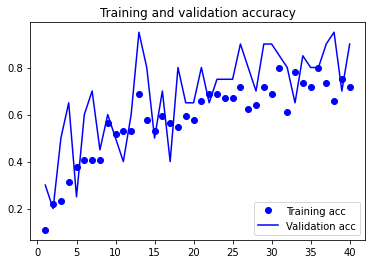

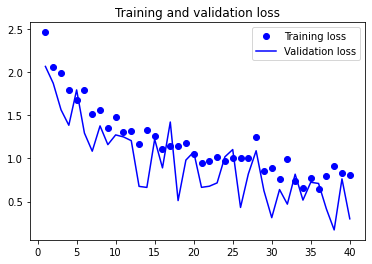

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

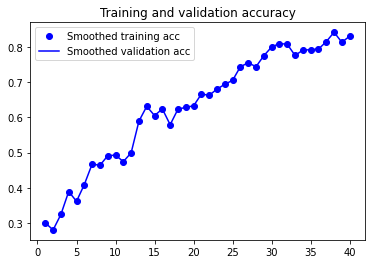

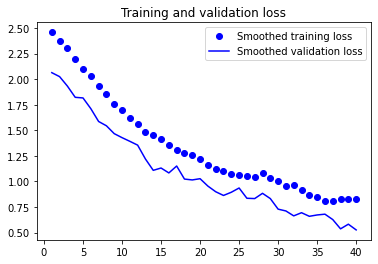

In [12]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
smooth_curve(val_acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Saving model for future use

In [13]:
model.save('/content/drive/My Drive/yoga_set/yoga_ges_71_90.h5')